In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import plotly.express as px 
import plotly.graph_objects as go

from platonicsolidsquadrature import * 

In [3]:
n = 10
platonicsolid = "ico"

pts,weights,neighbours,ptsdual,vertices,faces = platonicsolidsquadrature(platonicsolid, n)

In [4]:
print("Difference between qweights and 4pi: {}".format(sum(weights)-np.pi*4))

Difference between qweights and 4pi: -2.8684610242635245e-11


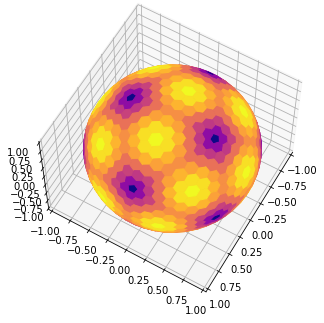

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
cmap = matplotlib.cm.get_cmap('plasma')
    
weights -= np.min(weights)
weights /= np.max(weights)
nneighbours = [int(sum(neighbours[i,:]>=0)) for i in range(neighbours.shape[0])] 
for i in range(neighbours.shape[0]):
    x = [ptsdual[i,k,0] for k in range(nneighbours[i])]
    y = [ptsdual[i,k,1] for k in range(nneighbours[i])]
    z = [ptsdual[i,k,2] for k in range(nneighbours[i])]
    verts = [list(zip(x,y,z))]
    ax.add_collection3d(Poly3DCollection(verts,color = cmap(weights[i])))
    
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.view_init(60, 30)
plt.show()
